<a href="https://colab.research.google.com/github/MuhammadHassan667410/160-Days-of-learning-complete-AI/blob/main/Phase%202%20%3A%20Machine%20Learning%2C(Day%2020%20to%2050)/Unsupervised%20ML(Day%2029%20to%2032)/HierarchicalClusteringPractice_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv(r'Downloads\internet_usage.csv')
df.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..


In [ ]:
df1 = df.drop(df[['Country Name', 'Country Code']], axis = 1)

In [ ]:
df1.replace('..', np.nan, inplace=True)

In [ ]:
df1

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,1.84,3.55,...,7,8.26,11,13.5,16.8,17.6,18.4,NaN,NaN,NaN
1,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,23.86,41.2,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,10.18,11.23,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.5388,NaN,11.2605,13.5464,26.838,37.6058,48.9368,70.87,70.04,78.53,...,86.1,87.9,89.7,91.5675,NaN,90.7187,93.2056,93.8975,94.4855,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,13.8151,18.3758,27.4944,27.4291,27.377,27.3443,27.3326,27.3393,27.3618,27.3965,...,50.07,54.8391,59.6083,64.3775,NaN,NaN,NaN,NaN,NaN,NaN
213,1.11131,1.83685,3.10009,4.13062,4.4009,16.005,18.41,21.176,24.358,32.23,...,53.6652,56.7,59.9,63.3,64.4,70.6226,76.01,81.83,88.6469,86.6377
214,0.0825004,0.0908025,0.518796,0.604734,0.881223,1.0486,1.24782,5.01,6.89,9.96,...,22.55,24.0854,24.5792,26.7184,NaN,NaN,13.8152,14.8881,17.6948,NaN
215,0.191072,0.23313,0.477751,0.980483,1.1,1.3,1.6,1.9,2.2,2.5,...,6.5,8.8,10.3,12.2,14.3,18.7,24.4992,26.9505,31.2342,NaN


In [ ]:
for col in df1.columns:
    df1[col] = df1[col].astype('float64')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    196 non-null    float64
 1   2001    199 non-null    float64
 2   2002    202 non-null    float64
 3   2003    196 non-null    float64
 4   2004    199 non-null    float64
 5   2005    200 non-null    float64
 6   2006    199 non-null    float64
 7   2007    204 non-null    float64
 8   2008    202 non-null    float64
 9   2009    202 non-null    float64
 10  2010    201 non-null    float64
 11  2011    204 non-null    float64
 12  2012    202 non-null    float64
 13  2013    201 non-null    float64
 14  2014    201 non-null    float64
 15  2015    200 non-null    float64
 16  2016    203 non-null    float64
 17  2017    206 non-null    float64
 18  2018    176 non-null    float64
 19  2019    186 non-null    float64
 20  2020    192 non-null    float64
 21  2021    190 non-null    float64
 22  20

In [ ]:
for col in df1.columns:
    df1[col].fillna(df1[col].mean(), inplace=True)

C:\Users\taj\AppData\Local\Temp\ipykernel_5396\2473820688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].mean(), inplace=True)


In [ ]:
df1

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,8.732304,0.004723,0.004561,0.087891,0.105809,1.22415,2.107120,1.900000,1.840000,3.550000,...,7.000000,8.260000,11.000000,13.500000,16.800000,17.600000,18.40000,67.88072,71.291703,87.666746
1,0.114097,0.325798,0.390081,0.971900,2.420390,6.04389,9.609990,15.036100,23.860000,41.200000,...,54.300000,56.900000,59.600000,62.400000,65.400000,68.550400,72.23770,79.32370,82.613700,83.135600
2,0.491706,0.646114,1.591640,2.195360,4.634480,5.84394,7.375980,9.451190,10.180000,11.230000,...,29.500000,38.200000,42.945500,47.691100,49.038500,58.977600,60.65340,66.23560,71.243200,87.666746
3,8.732304,10.653857,13.617630,16.108085,18.520151,20.79910,23.379992,25.597037,28.513325,31.238002,...,45.211018,48.034621,51.389652,54.664937,57.863789,61.250281,64.49232,67.88072,71.291703,87.666746
4,10.538800,10.653857,11.260500,13.546400,26.838000,37.60580,48.936800,70.870000,70.040000,78.530000,...,86.100000,87.900000,89.700000,91.567500,57.863789,90.718700,93.20560,93.89750,94.485500,87.666746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,13.815100,18.375800,27.494400,27.429100,27.377000,27.34430,27.332600,27.339300,27.361800,27.396500,...,50.070000,54.839100,59.608300,64.377500,57.863789,61.250281,64.49232,67.88072,71.291703,87.666746
213,1.111310,1.836850,3.100090,4.130620,4.400900,16.00500,18.410000,21.176000,24.358000,32.230000,...,53.665200,56.700000,59.900000,63.300000,64.400000,70.622600,76.01000,81.83000,88.646900,86.637700
214,0.082500,0.090802,0.518796,0.604734,0.881223,1.04860,1.247820,5.010000,6.890000,9.960000,...,22.550000,24.085400,24.579200,26.718400,57.863789,61.250281,13.81520,14.88810,17.694800,87.666746
215,0.191072,0.233130,0.477751,0.980483,1.100000,1.30000,1.600000,1.900000,2.200000,2.500000,...,6.500000,8.800000,10.300000,12.200000,14.300000,18.700000,24.49920,26.95050,31.234200,87.666746


In [ ]:
import scipy.cluster.hierarchy as shc

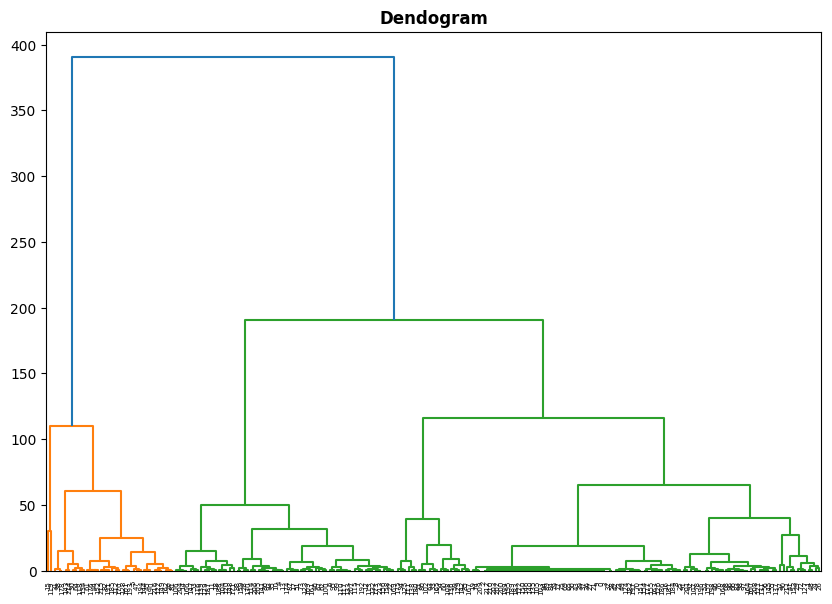

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Dendogram', fontweight='bold')
dend = shc.dendrogram(shc.linkage(df1[['2022', '2023']], method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering(n_clusters=3)
labels_ = model.fit_predict(df1[['2022', '2023']])

In [ ]:
labels_

array([0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0,
       1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1])

Text(0, 0.5, '2023')

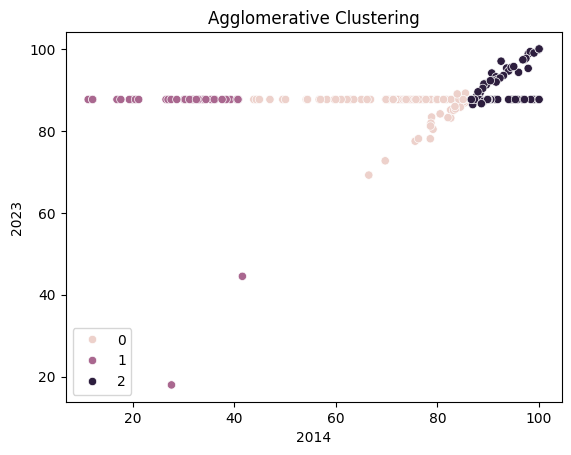

In [ ]:
import seaborn as sns

sns.scatterplot(x=df1.iloc[:, 22], y=df1.iloc[:, 23], hue=model.labels_)
plt.title("Agglomerative Clustering")
plt.xlabel('2014')
plt.ylabel('2023')